In [63]:
import pandas as pd
import numpy as np
import inventorize3 as inv
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
%%html
<style>
.cm-comment {
    color: white !important;
}
</style>

In [13]:
data=pd.read_csv('for_abc.csv')

In [14]:
data=data.drop('Unnamed: 0',axis=1)

In [15]:
data.head()

,Description,total_sales,total_revenue
0,DOORMAT UNION JACK GUNS AND ROSES,167,1071.25
1,3 STRIPEY MICE FELTCRAFT,662,1241.10
2,4 PURPLE FLOCK DINNER CANDLES,324,495.16
3,50'S CHRISTMAS GIFT BAG LARGE,1885,2272.25
4,ANIMAL STICKERS,385,80.85


In [17]:
data['Description']

0         DOORMAT UNION JACK GUNS AND ROSES
1                  3 STRIPEY MICE FELTCRAFT
2             4 PURPLE FLOCK DINNER CANDLES
3             50'S CHRISTMAS GIFT BAG LARGE
4                           ANIMAL STICKERS
                       ...                 
5278        ZINC T-LIGHT HOLDER STARS SMALL
5279         ZINC TOP  2 DOOR WOODEN SHELF 
5280       ZINC WILLIE WINKIE  CANDLE STICK
5281            ZINC WIRE KITCHEN ORGANISER
5282       ZINC WIRE SWEETHEART LETTER TRAY
Name: Description, Length: 5283, dtype: object

In [18]:
abc_analysis=inv.ABC(data[['Description','total_sales']])

In [19]:
abc_analysis

,Description,total_sales,Percentage,comulative,Category
5168,WORLD WAR 2 GLIDERS ASSTD DESIGNS,105185,9.990307e-03,0.009990,A
5047,WHITE HANGING HEART T-LIGHT HOLDER,91757,8.714937e-03,0.018705,A
3129,"PAPER CRAFT , LITTLE BIRDIE",80995,7.692779e-03,0.026398,A
292,ASSORTED COLOUR BIRD ORNAMENT,78234,7.430543e-03,0.033829,A
2695,MEDIUM CERAMIC TOP STORAGE JAR,77916,7.400340e-03,0.041229,A
...,...,...,...,...,...
3451,PINK STRIPES SHOULDER BAG,1,9.497844e-08,1.000000,C
4370,SILVER AND BLACK ORBIT NECKLACE,1,9.497844e-08,1.000000,C
479,BLACK DIAMOND CLUSTER EARRINGS,1,9.497844e-08,1.000000,C
4271,SET/2 SPOTTY + ROSE TEA TOWELS,1,9.497844e-08,1.000000,C


In [23]:
abc_analysis[['Category']].value_counts()

Category
C           2881
B           1245
A           1157
dtype: int64

<Axes: xlabel='Category', ylabel='count'>

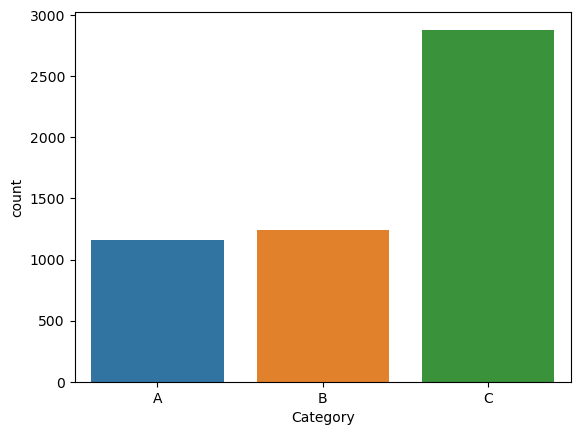

In [24]:
sns.countplot(x='Category',data=abc_analysis)

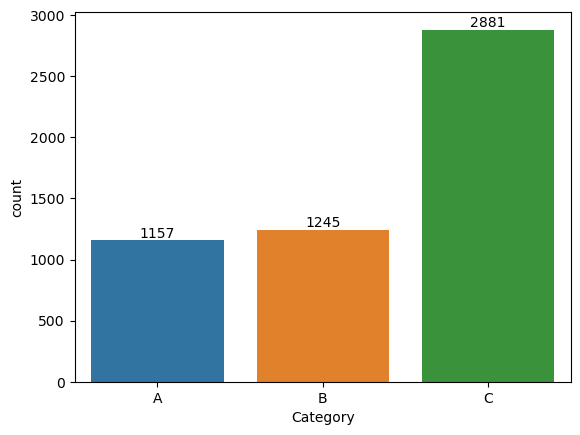

In [27]:
# Create the count plot
ax = sns.countplot(x='Category', data=abc_analysis)

# Add data labels on the count bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.show()

<Axes: xlabel='Category', ylabel='total_sales'>

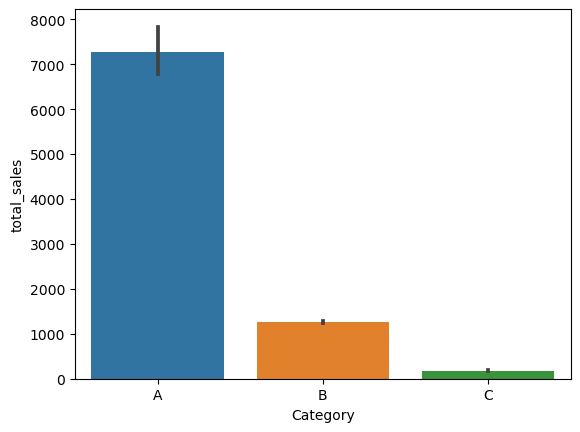

In [32]:
#abc_analysis.plot(x='Category',y='total_sales',kind='bar')
sns.barplot(x='Category',y='total_sales',data=abc_analysis)

In [33]:
help(inv.productmix)

Help on function productmix in module inventorize3:

productmix(skus, sales, revenue)
    [Identyfing ABC category based on the pareto rule for both demand and selling price,a mix of nine categories are produced.
    Identyfing ABC category based on the pareto rule.A category is up to 80%. B category is up 95% and C category is up to 100%.
     ]
    
    Args:
    SKUs ([array]): [charachter, a vector of SKU names.]
    sales ([array]): [a vector of items sold per sku, should be the same number of rows as SKUs.]
    revenue ([array]): [a vector of total revenue  per sku, should be the same number of rows as SKUs.]
    
    
    Returns:
    [pandas.DataFrame]: [a dataframe that contains ABC categories by sales and rvenue]
    Examples:
    [ productmix(SKUs= numpy.array(range(1,1001)),sales = ales= numpy.random.uniform(1,10000,1000),
    revenue=numpy.random.uniform(1,80000,1000))]



In [36]:
multi_abc=inv.productmix(data['Description'],data['total_sales'],data['total_revenue'])

In [37]:
multi_abc.head(2)

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
3769,REGENCY CAKESTAND 3 TIER,24139,277656.25,0.002293,0.177816,0.015980,0.015980,A,A,A_A
5047,WHITE HANGING HEART T-LIGHT HOLDER,91757,247048.01,0.008715,0.018705,0.014219,0.030199,A,A,A_A


In [43]:
multi_abc['product_mix'].value_counts().sort_values()

A_C      65
C_A      74
B_A     288
A_B     317
B_C     325
C_B     413
B_B     632
A_A     775
C_C    2394
Name: product_mix, dtype: int64

In [50]:
multi_abc['product_mix'][multi_abc['revenue_category']=='A'].value_counts()

A_A    775
B_A    288
C_A     74
Name: product_mix, dtype: int64

<Axes: xlabel='product_mix', ylabel='count'>

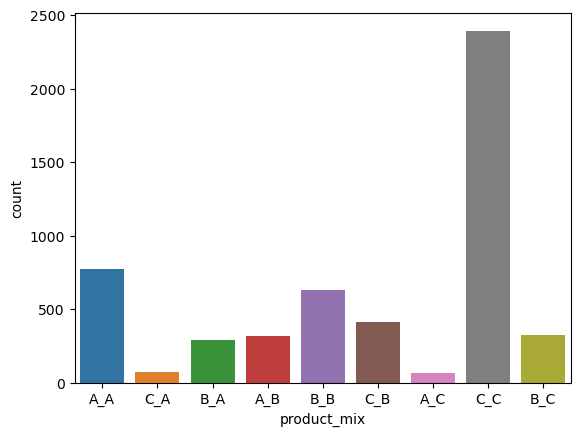

In [52]:
sns.countplot(x=multi_abc['product_mix'])

<Axes: xlabel='product_mix', ylabel='sales'>

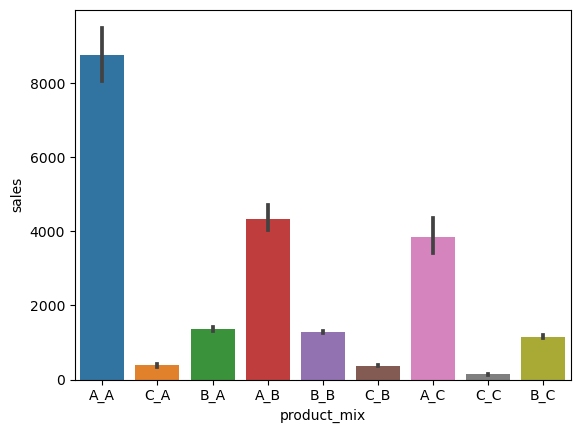

In [53]:
sns.barplot(x=multi_abc['product_mix'],y=multi_abc['sales'])

In [54]:
retail=pd.read_csv('online_retail_udemy.csv')

In [55]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [58]:
retail.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0


In [57]:
retail['Sales']=retail['Quantity']*retail['Price']

In [61]:
retail.groupby('Country')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Australia,1913.0,87.364909,142.086762,-662.25,15.0000,30.000,108.0000,1718.40
Austria,938.0,24.709595,34.030870,-130.00,12.8250,17.000,23.4000,360.00
Bahrain,126.0,22.710714,35.862325,-205.74,14.1750,17.000,24.9500,205.74
Belgium,3123.0,20.356865,42.205593,-1508.65,13.2000,16.600,20.8000,1508.65
Bermuda,34.0,36.857059,53.406448,10.20,16.5000,21.000,29.9250,241.92
Brazil,94.0,15.019894,24.370216,0.55,2.5125,5.575,17.2550,175.20
Canada,228.0,21.416842,49.965088,2.50,11.5500,15.300,19.8000,550.94
Channel Islands,1664.0,24.912025,54.940967,-934.66,14.8500,17.400,25.5000,885.00
Cyprus,1176.0,20.546548,31.775834,-320.69,10.2000,15.300,20.2800,350.40


In [77]:
Sales_Country=retail.groupby(['Country','Description'])['Sales'].sum()
Sales_Country=pd.DataFrame(Sales_Country)
Sales_Country

Sales
Country     Description                              
Australia    DOLLY GIRL BEAKER                 216.00
             I LOVE LONDON MINI BACKPACK        16.60
            10 COLOUR SPACEBOY PEN              40.80
            12 PENCIL SMALL TUBE WOODLAND      211.20
            12 PENCILS SMALL TUBE RED SPOTTY    15.60
...                                               ...
West Indies VINTAGE BEAD PINK SCARF             23.85
            WHITE AND BLUE CERAMIC OIL BURNER    7.50
            WOODLAND PARTY BAG + STICKER SET     1.65
            WOVEN BERRIES CUSHION COVER          9.90
            WOVEN FROST CUSHION COVER            9.90

[30696 rows x 1 columns]

In [73]:
retail.groupby(['Description','Country'])['Sales'].agg(Sales=('Quantity',np.sum))
#retail.groupby(['Description','Country'])['Sales'].agg(Sales=('Sales', np.sum))


TypeError: func is expected but received tuple in **kwargs.

In [85]:
country_data=retail.groupby(['Description', 'Country']).agg(Quantity=('Quantity', 'sum'),Sales=('Sales','sum'))

In [94]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30696 entries, 0 to 30695
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  30696 non-null  object 
 1   Country      30696 non-null  object 
 2   Quantity     30696 non-null  int64  
 3   Sales        30696 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 959.4+ KB


In [93]:
country_data=country_data.reset_index()

In [109]:
country_data.loc[:'Description']

,Description,Country,Quantity,Sales
0,DOORMAT UNION JACK GUNS AND ROSES,Malta,2,13.50
1,DOORMAT UNION JACK GUNS AND ROSES,United Kingdom,177,1193.31
2,3 STRIPEY MICE FELTCRAFT,Germany,36,70.20
3,3 STRIPEY MICE FELTCRAFT,Netherlands,19,37.05
4,3 STRIPEY MICE FELTCRAFT,Portugal,6,11.70
...,...,...,...,...
30691,wrongly marked carton 22804,United Kingdom,-256,0.00
30692,wrongly marked. 23343 in box,United Kingdom,-3100,0.00
30693,wrongly sold (22719) barcode,United Kingdom,170,0.00
30694,wrongly sold as sets,United Kingdom,-600,0.00


In [88]:
help(inv.productmix_storelevel)

Help on function productmix_storelevel in module inventorize3:

productmix_storelevel(SKUs, sales, revenue, storeofsku)
    [Identyfing ABC category based on the pareto rule for both demand and selling price,a mix of nine categories are produced.
       Identyfing ABC category based on the pareto rule.A category is up to 80%. B category is up 95% and C category is up to 100%.
       in this fuction the data is splitted by store and a product mix is made on each store individually.]
    
    Args:
      SKUs ([array]): [charachter, a vector of SKU names.]
      sales ([array]): [a vector of items sold per sku, should be the same number of rows as SKUs.]
      revenue ([array]): [a vector of total revenue  per sku, should be the same number of rows as SKUs.]
      storeofsku ([array]): [vector, which store the SKU is sold at.should be the same number of rows as SKUs.]
    
    Returns:
      [pandas.DataFrame]: [a dataframe that contains ABC categories by store with a bar plot of the cou

In [111]:
country_group

,sku,sales,revenue,storeofsku,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
19653,POSTAGE,10,525.00,Malta,0.004014,0.708952,0.101113,0.101113,A,A,A_A
11009,GRAND CHOCOLATECANDLE,147,198.75,Malta,0.059012,0.059012,0.038278,0.139391,A,A,A_A
21388,REGENCY CAKESTAND 3 TIER,12,153.00,Malta,0.004817,0.680851,0.029467,0.168858,A,A,A_A
28247,VICTORIAN SEWING KIT,144,122.40,Malta,0.057808,0.116821,0.023574,0.192432,A,A,A_A
21513,REGENCY TEAPOT ROSES,8,79.60,Malta,0.003212,0.719791,0.015331,0.207763,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...,...
1810,ASSORTED ICE CREAM FRIDGE MAGNETS,24,15.60,Bermuda,0.008578,0.903503,0.012449,0.954514,B,C,B_C
5530,CHILDS APRON SPACEBOY DESIGN,8,15.60,Bermuda,0.002859,0.982130,0.012449,0.966963,C,C,C_C
3089,BLUE FAIRY CAKE CHILD'S APRON,8,15.60,Bermuda,0.002859,0.984989,0.012449,0.979412,C,C,C_C
21027,RED SPOTTY CHILDS APRON,8,15.60,Bermuda,0.002859,0.987848,0.012449,0.991860,C,C,C_C


In [ ]:
country_group=inv.productmix_storelevel(country_data['Description'],country_data['Quantity'],country_data['Sales'],country_data['Country'])

In [112]:
country_group[country_group['storeofsku']=='United Kingdom'].groupby('product_mix')['storeofsku'].count()  # multicriterion ABC for different stores/country

product_mix
A_A     696
A_B     249
A_C      99
B_A     220
B_B     414
B_C     359
C_A      98
C_B     410
C_C    3123
Name: storeofsku, dtype: int64